<a href="https://colab.research.google.com/github/ggranadillo21/Mytest/blob/master/AnomalyDetection_Autoencoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [185]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError

# Download the dataset
#PATH_TO_DATA = 'http://storage.googleapis.com/download.tensorflow.org/data/ecg.csv'
PATH_TO_DATA ='muestra1.csv'
data = pd.read_csv(PATH_TO_DATA, header=None)
data = data.drop(0, axis=0)
data = data.drop(0, axis=1)
data = data.drop(12, axis=1)
data = data.drop(13, axis=1)
data.head()
#data.shape
# data shape
# (10487, 15)
#Label 1 denotes the observation as an anomaly and label 0 denotes the observation as normal.

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,NaN,Duration,Proto,SrcPt,DstPt,Packets,Bytes,Flags,Tos,class,Packets_speed,Bytes_speed,Hour,Min,Sec
1,1.0,0,6,33877,443,1,66,16,0,0,10000,660000,36,30,3
2,2.0,0.042,6,80,52335,2,413,26,32,0,47.6190476190476,9833.33333333333,24,54,3
3,3.0,0.215,6,51696,80,8,1350,26,0,0,37.2093023255814,6279.06976744186,28,50,0
4,4.0,0.143,6,37251,443,4,1810,24,0,0,27.972027972028,12657.3426573427,38,32,6


In [211]:
# 9th column is the target
# 1 = anomaly, 0 = normal

x_train = pd.read_csv("x_train.csv", header=None)
x_train = x_train.drop(0, axis=0)
x_train = x_train.drop(0, axis=1)
x_train = x_train.drop(x_train.columns[[10, 11, 12]], axis=1)

y_train = pd.read_csv("y_train.csv", header=None)
y_train = y_train.drop(0, axis=0)
y_train = y_train.drop(0, axis=1)

x_test = pd.read_csv("x_test.csv", header=None)
x_test = x_test.drop(0, axis=0)
x_test = x_test.drop(0, axis=1)
x_test = x_test.drop(x_test.columns[[10, 11, 12]], axis=1)

y_test = pd.read_csv("y_test.csv", header=None)
y_test = y_test.drop(0, axis=0)
y_test = y_test.drop(0, axis=1)


# min max scale the input data
min_max_scaler = MinMaxScaler(feature_range=(0, 1))
x_train_scaled = min_max_scaler.fit_transform(x_train.copy())
x_test_scaled = min_max_scaler.transform(x_test.copy())

x_train

,1,2,3,4,5,6,7,8,9,10
1,0,6,33877,443,1,66,16,0,10000,660000
2,0.042,6,80,52335,2,413,26,32,47.6190476190476,9833.33333333333
3,0.215,6,51696,80,8,1350,26,0,37.2093023255814,6279.06976744186
4,0.143,6,37251,443,4,1810,24,0,27.972027972028,12657.3426573427
5,0,6,35641,80,1,66,16,0,10000,660000
...,...,...,...,...,...,...,...,...,...,...
6996,0,6,60691,80,1,66,16,0,10000,660000
6997,0,6,80,42308,1,54,4,32,10000,540000
6998,0.183,6,54145,443,4,2853,24,0,21.8579234972678,15590.1639344262
6999,0.038,17,53,41689,2,222,0,0,52.6315789473684,5842.1052631579


In [ ]:
# create a model by subclassing Model class in tensorflow
class AutoEncoder(Model):
  """
  Parameters
  ----------
  output_units: int
    Number of output units
  
  code_size: int
    Number of units in bottle neck
  """

  def __init__(self, output_units, code_size=8):
    super().__init__()
    self.encoder = Sequential([
      Dense(512, activation='relu'),
      Dropout(0.01),
      Dense(256, activation='relu'),
      Dropout(0.01),
      Dense(128, activation='relu'),
      Dropout(0.01),
      Dense(code_size, activation='relu')
    ])
    self.decoder = Sequential([
      Dense(128, activation='relu'),
      Dropout(0.01),
      Dense(256, activation='relu'),
      Dropout(0.01),
      Dense(512, activation='relu'),
      Dropout(0.01),
      Dense(output_units, activation='sigmoid')
    ])
  
  def call(self, inputs):
    encoded = self.encoder(inputs)
    decoded = self.decoder(encoded)
    return decoded
  
model = AutoEncoder(output_units=x_train_scaled.shape[1])
# configurations of model
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

history = model.fit(
    x_train_scaled,
    x_train_scaled,
    epochs=100,
    batch_size=128,
    validation_data=(x_test_scaled, x_test_scaled)
)

Epoch 1/100
55/55 [==============================] - 4s 34ms/step - loss: 0.3353 - accuracy: 0.4014 - val_loss: 0.2264 - val_accuracy: 0.6041
Epoch 2/100
55/55 [==============================] - 1s 25ms/step - loss: 0.2119 - accuracy: 0.7739 - val_loss: 0.1973 - val_accuracy: 0.9406
Epoch 3/100
55/55 [==============================] - 1s 25ms/step - loss: 0.1943 - accuracy: 0.9080 - val_loss: 0.1915 - val_accuracy: 0.9134
Epoch 4/100
55/55 [==============================] - 2s 27ms/step - loss: 0.1922 - accuracy: 0.9150 - val_loss: 0.1899 - val_accuracy: 0.9426
Epoch 5/100
55/55 [==============================] - 1s 25ms/step - loss: 0.1912 - accuracy: 0.9201 - val_loss: 0.1894 - val_accuracy: 0.9426
Epoch 6/100
55/55 [==============================] - 1s 23ms/step - loss: 0.1907 - accuracy: 0.9241 - val_loss: 0.1894 - val_accuracy: 0.9203
Epoch 7/100
55/55 [==============================] - 1s 22ms/step - loss: 0.1904 - accuracy: 0.9277 - val_loss: 0.1887 - val_accuracy: 0.9168
Epoch 

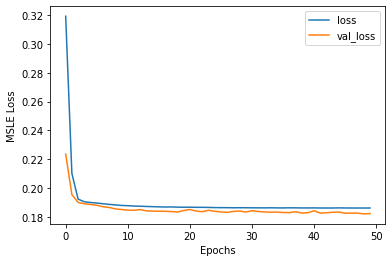

In [281]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('MSLE Loss')
plt.legend(['loss', 'val_loss'])
plt.show()

In [282]:
def find_threshold(model, x_train_scaled):
  reconstructions = model.predict(x_train_scaled)
  # provides losses of individual instances
  reconstruction_errors = tf.keras.losses.msle(reconstructions, x_train_scaled)
  # threshold for anomaly scores
  threshold = np.mean(reconstruction_errors.numpy()) \
      + np.std(reconstruction_errors.numpy())
  return threshold

def get_predictions(model, x_test_scaled, threshold):
  predictions = model.predict(x_test_scaled)
  # provides losses of individual instances
  errors = tf.keras.losses.msle(predictions, x_test_scaled)
  # 1 = anomaly, 0 = normal
  anomaly_mask = pd.Series(errors) > threshold
  preds = anomaly_mask.map(lambda x: 1 if x == True else 0)
  return preds

threshold = find_threshold(model, x_train_scaled)
print(f"Threshold: {threshold}")
# Threshold: 0.01001314025746261


Threshold: 9.341444788289367e-05


In [283]:
predictions = get_predictions(model, x_test_scaled, threshold)
predictions = pd.DataFrame(predictions)
predictions = predictions.rename(columns={0:'class'})
y_test = y_test.rename(columns={1:'class'})
y_test["class"] = y_test["class"].astype(str).astype(int)

accuracy_score(predictions, y_test)


0.6858864027538726

In [150]:

predictions

,class
0,1
1,1
2,1
3,1
4,1
...,...
3481,1
3482,1
3483,1
3484,1
